# **Deployment**

---



#### Getting started
It's good that you made a model with a decent accuracy and all, but what good is this model if you can not integrate it with other application (new/old).

#### Goal
The goal of this task is to teach you how to deploy your model and not to build a model so we will be providing you a model (2 pickle files).

> twitter_predictions.pkl

> vectorizer.pkl

We will be using **FLASK** to deploy our model because:

*   Flask is easy to learn
*   Flask is faster

You can also use Django if you already have a running backend or make another backend for ml models like someone ik did in a hackthon. lazy guy.



## **FLASK**

---

Below is a video tutorial about FLASK. It's really ok if you don't know FLASK in depth but this will teach you just enough. Feel free to mess around, explore and ping your mentors if you are stuck. We will be your step-brother.



```
It is a shame for a coder to die without fully messing up with things
```

> All-in-on link for FLASK


*   Cringe Level (Tutorialspoint): https://www.tutorialspoint.com/flask/index.htm
*   Noobie Level (YouTube): https://www.youtube.com/watch?v=3mwFC4SHY-Y
*   God Level (Documentation): https://flask.palletsprojects.com/en/2.2.x/tutorial/



# Part 1 (NLP Model)

Below is a drive link from where you can download those 2 folder (model and templates). Model contains 2 pkl files and templates contains a html file (because we are obv not going to teach you frontend)

https://drive.google.com/drive/folders/1UW6I5p12h3ZRnr0djC-aIofnb0QIdfi0?usp=sharing

We will be completing this task on your local machine so make sure you have all the dependencies installed.

Make a .txt file named "nltk.txt" and copy paste below 5 things.


```
stopwords
wordnet
pros_cons
reuters
omw-1.4
```

pip install below mentioned modules:

1.   flask
2.   pandas
3.   numpy
4.   gunicorn
5.   lightgbm
6.   nltk

The data cleaning process involved removing all URLs, punctuations and NLTK library was used for Tokenization, Lemmetization and removing stop words. 

# Part 2 (Flask)

Assuming you all know basics of FLASK now, so getting things started. Make a "app.py" file. We will be coding only this file.

Just to keep us on the same page. Your file structure should look like this.

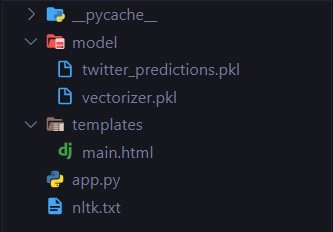

In [ ]:
# Install dependencies
import flask
import pickle
import pandas as pd
import numpy as np
import nltk
import string
import re

In [ ]:
# Load pre-trained model
with open(f'models/twitter_predictions.pkl', 'rb') as f:
    model = pickle.load(f)

with open(f'models/vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)


# Remove URLs
def remove_url(text):
    return re.sub(r"http\S+", "", text)

# Removing Punctuations
# I may leave blank space (ts) where i get bored, so dont thing task is buggy
def remove_punct(text):
     return ''.join(char for char in text if char not in string.punctuation)

#Tokenizer
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

#Removing Stop words
from nltk.corpus import stopwords

def remove_sw(text):
    # new_text = []
    # for t in text:
    #     if t not in stopwords.words('english'):
    #         new_text.append(t)
    words = tokenizer.tokenize(text)
    return [word for word in words if word.lower() not in stopwords.words('english')]                                                       # you might want to return something


#Lemmatizaion
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    # new_text = []
    # for t in text:
    #     # lem_text = lemmatizer.lemmatize(t)
    #     new_text.append(lem_text)
    # return new_text
    lemmas = [lemmatizer.lemmatize(word) for word in text]
    return lemmas


In [ ]:
app = flask.Flask(__name__, template_folder='templates')

@app.route('/', methods=['GET', 'POST'])
def main():
    if flask.request.method == 'GET':
        return flask.render_template('main.html')

    if flask.request.method == 'POST':
        tweet = flask.request.form['tweet']
        df = pd.DataFrame({'tweet': [tweet]})

        df['tweet'] = df['tweet'].apply(lambda t: remove_url(t))
        df['tweet'] = df['tweet'].apply(lambda t: remove_punct(t))
        df['tweet'] = df['tweet'].apply(lambda t: tokenizer.tokenize(t.lower()))
        df['tweet'] = df['tweet'].apply(lambda t: remove_sw(t))
        df['tweet'] = df['tweet'].apply(lambda t: word_lemmatizer(t))

        final_text = df['tweet']
        final_text = final_text.apply(lambda x: ' '.join(x))
        final_text = vectorizer.transform(final_text)

        prediction = model.predict_proba(final_text)
        positive = round(prediction[0][0] * 100)
        negative = round(prediction[0][1] * 100)

        return flask.render_template('main.html', original_input={'Review':tweet}, rating1=positive, rating2=negative)
if __name__ == '__main__':
    app.run()

# Running model

Now open your command line and type:
```
flask run
```

It should run on 5000 default port. You should be able to see this.

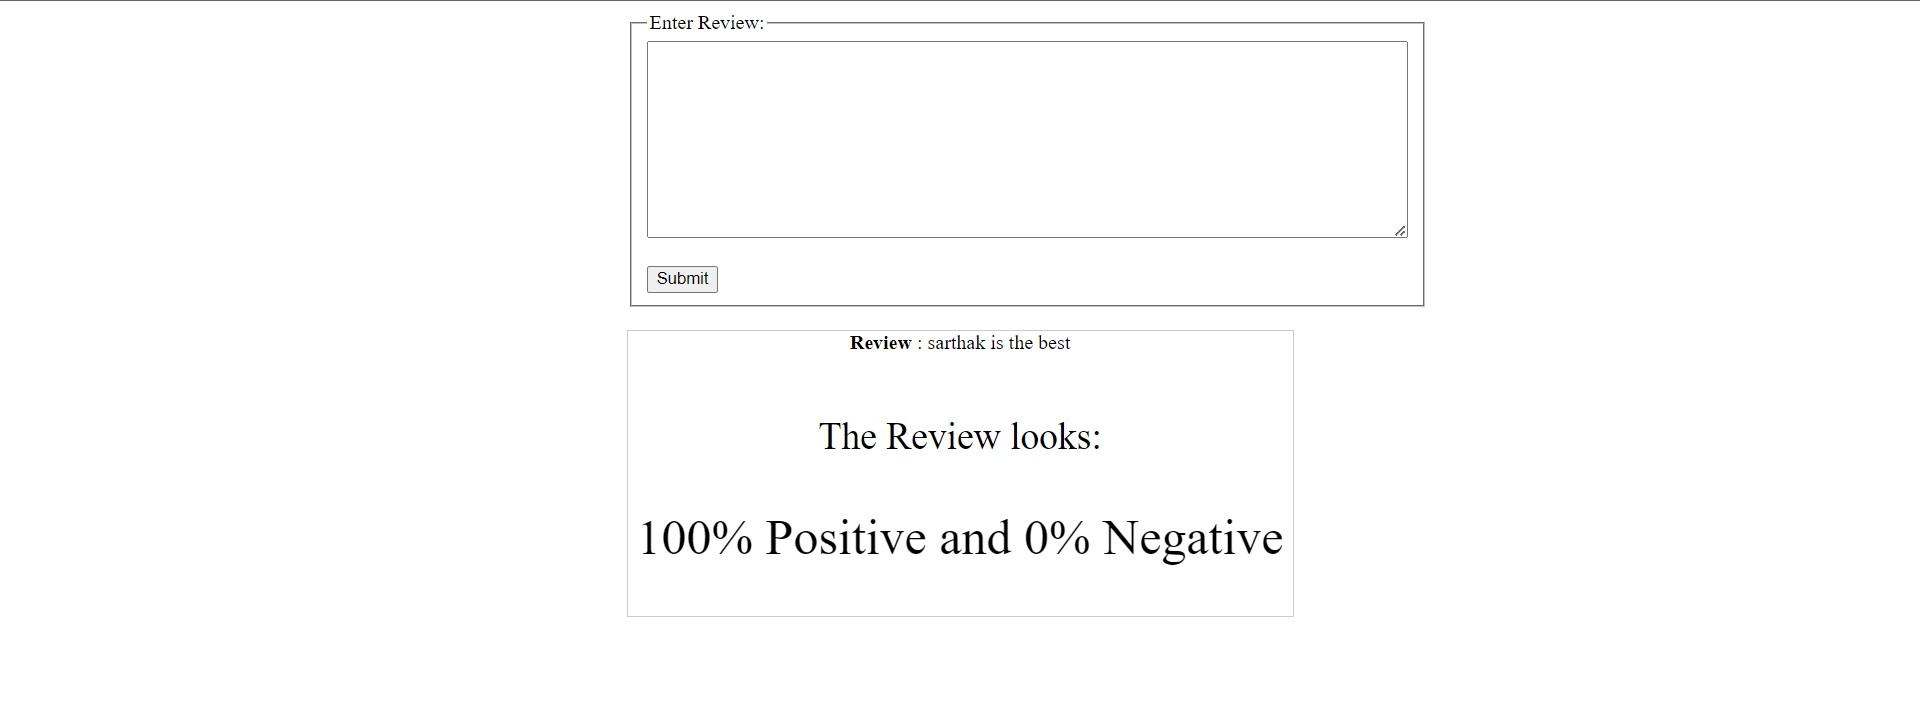